In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

출발 지연 시간과 도착 지연 시간의 상관계수: 0.9655
--------------------------------------------------
상관관계 시각화 그래프를 생성합니다...


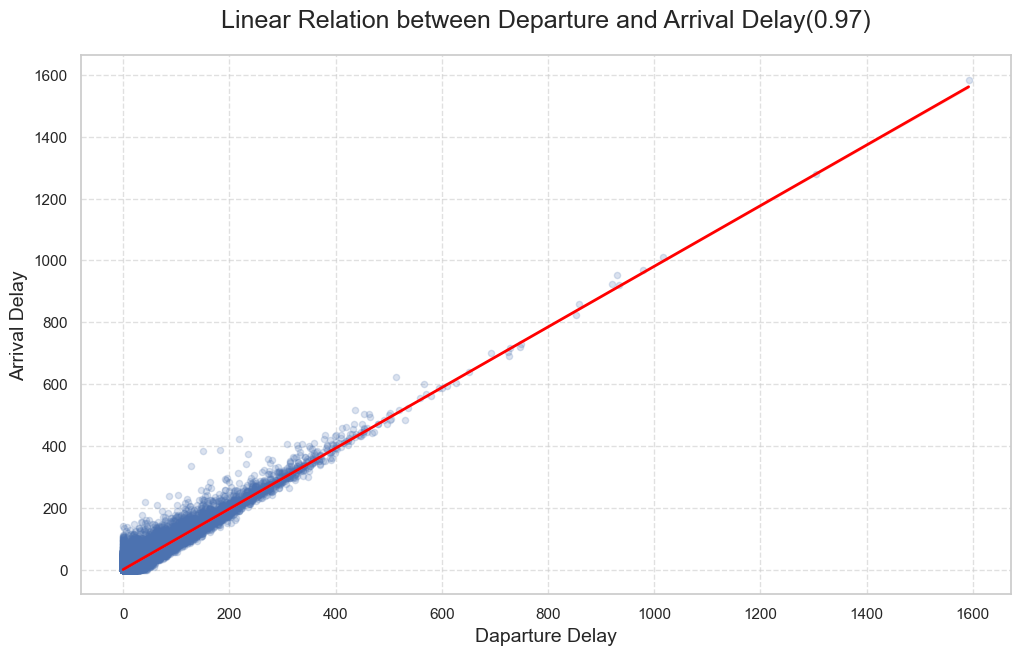

In [16]:
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('../data/train.csv')

    # 2. 결측치 처리
df_cleaned = df.dropna(subset=['Departure Delay in Minutes', 'Arrival Delay in Minutes']).copy()

# 3. 상관계수 계산
# 두 변수 간의 피어슨 상관계수를 계산합니다.
correlation = df_cleaned['Departure Delay in Minutes'].corr(df_cleaned['Arrival Delay in Minutes'])
print(f"출발 지연 시간과 도착 지연 시간의 상관계수: {correlation:.4f}")
print("-" * 50)

# 4. 시각화 (산점도 및 회귀선)
print("상관관계 시각화 그래프를 생성합니다...")
plt.figure(figsize=(12, 7)) 
sns.regplot(
    data=df_cleaned,
    x='Departure Delay in Minutes',
    y='Arrival Delay in Minutes',
    scatter_kws={'alpha': 0.2, 's': 20}, 
    line_kws={'color': 'red', 'linewidth': 2} 
)

# 5. 그래프 제목 및 축 레이블 설정
plt.title('Linear Relation between Departure and Arrival Delay(0.97)', fontsize=18, pad=20)
plt.xlabel('Daparture Delay', fontsize=14)
plt.ylabel('Arrival Delay', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가

# 6. 그래프 출력
plt.show()


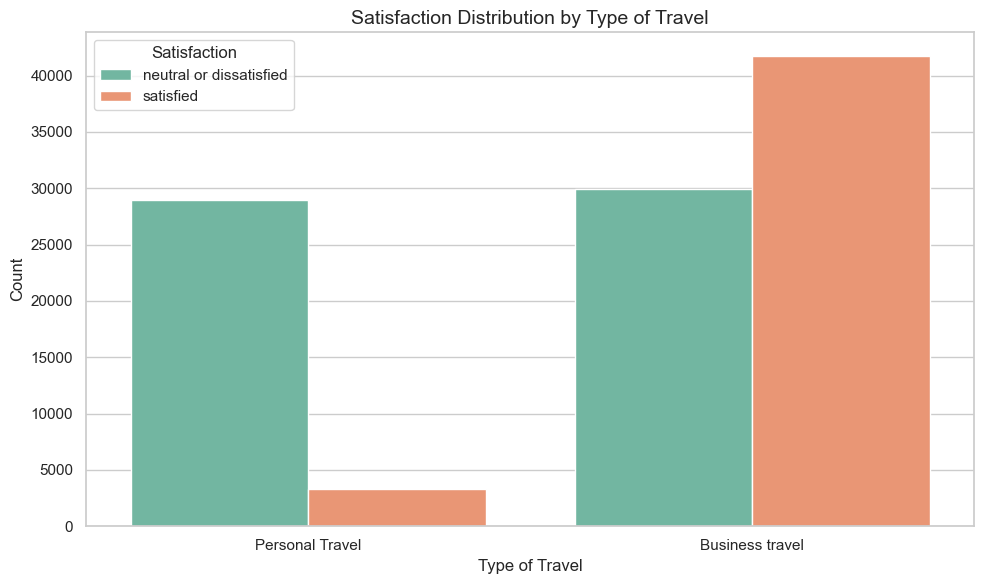

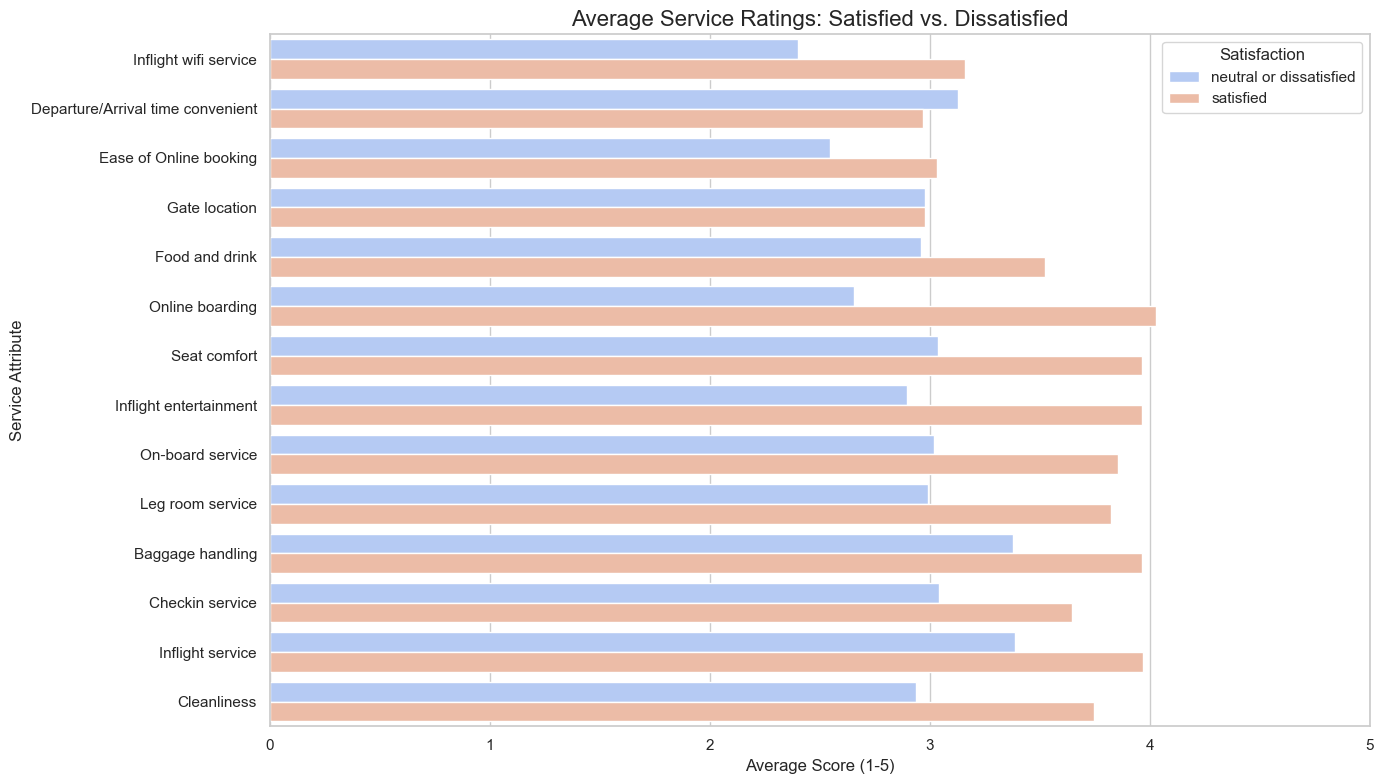

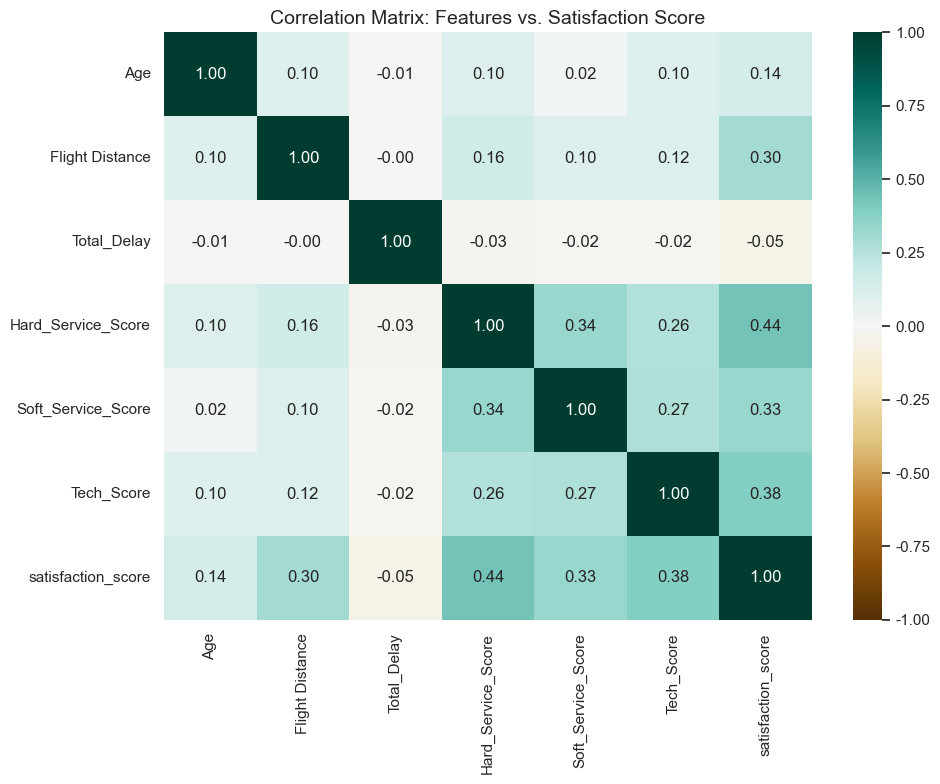

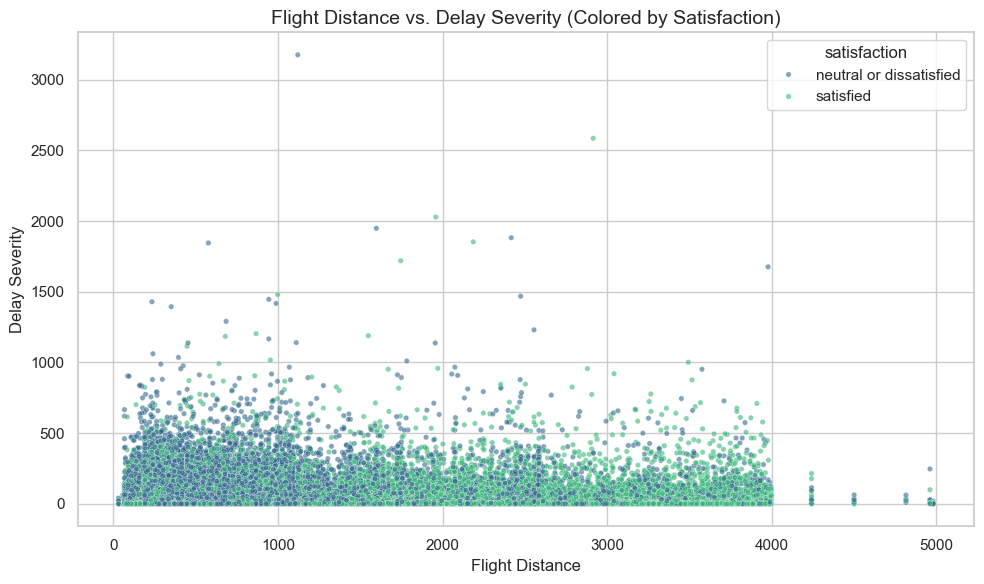

In [ ]:


df = pd.read_csv('../data/preprocessed_data.csv')
plt.rcParams['font.family'] = 'sans-serif'

# 1. Satisfaction by Customer Type & Travel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Travel', hue='satisfaction', data=df, palette='Set2')
plt.title('Satisfaction Distribution by Type of Travel', fontsize=14)
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()

# 2. Detailed Service Metrics Comparison (Radar-like insight via Bar Chart)
service_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                'Inflight entertainment', 'On-board service', 'Leg room service', 
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

avg_scores = df.groupby('satisfaction')[service_cols].mean().T.reset_index()
avg_scores = avg_scores.melt(id_vars='index', var_name='Satisfaction', value_name='Average Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Average Score', y='index', hue='Satisfaction', data=avg_scores, palette='coolwarm')
plt.title('Average Service Ratings: Satisfied vs. Dissatisfied', fontsize=16)
plt.xlabel('Average Score (1-5)')
plt.ylabel('Service Attribute')
plt.xlim(0, 5)
plt.tight_layout()

# 3. Correlation Heatmap of Numeric Features
numeric_cols = ['Age', 'Flight Distance', 'Total_Delay', 'Hard_Service_Score', 'Soft_Service_Score', 'Tech_Score', 'satisfaction_score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Features vs. Satisfaction Score', fontsize=14)
plt.tight_layout()



Original Correlation: -0.05450494140577842
Scaled Correlation: -0.05450494140577853
Log Transformed Correlation: -0.09062504591370223


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4680\2086642275.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_sat = df.groupby('Delay_Group')['satisfaction_score'].mean().reset_index()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_4680\2086642275.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delay_Group', y='satisfaction_score', data=delay_sat, palette='Reds_r')


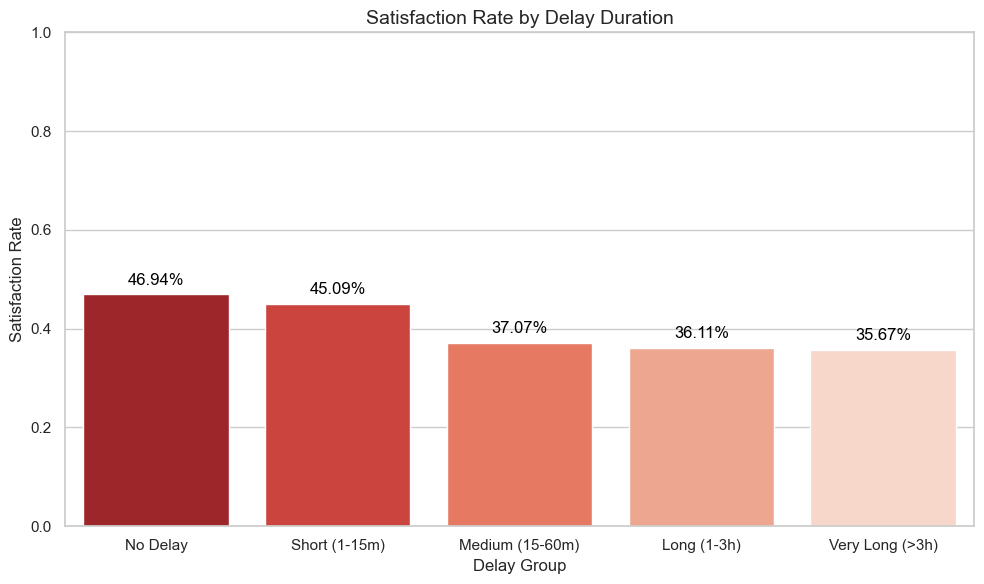

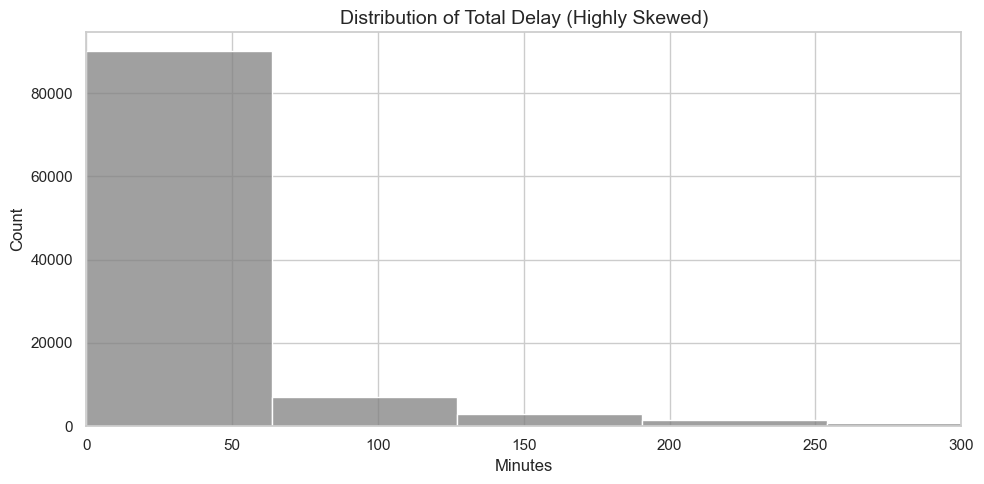

In [ ]:
from sklearn.preprocessing import StandardScaler
# 1. Check Correlation with and without Scaling
original_corr = df['Total_Delay'].corr(df['satisfaction_score'])

scaler = StandardScaler()
df['Total_Delay_Scaled'] = scaler.fit_transform(df[['Total_Delay']])
scaled_corr = df['Total_Delay_Scaled'].corr(df['satisfaction_score'])

# 2. Check Correlation with Log Transformation (Handling Skewness)
df['Total_Delay_Log'] = np.log1p(df['Total_Delay'])
log_corr = df['Total_Delay_Log'].corr(df['satisfaction_score'])

print(f"Original Correlation: {original_corr}")
print(f"Scaled Correlation: {scaled_corr}")
print(f"Log Transformed Correlation: {log_corr}")

# 3. Visualize the Non-linear relationship (Binning)
bins = [-1, 0, 15, 60, 180, df['Total_Delay'].max()]
labels = ['No Delay', 'Short (1-15m)', 'Medium (15-60m)', 'Long (1-3h)', 'Very Long (>3h)']
df['Delay_Group'] = pd.cut(df['Total_Delay'], bins=bins, labels=labels)

# Calculate satisfaction rate per group
delay_sat = df.groupby('Delay_Group')['satisfaction_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Delay_Group', y='satisfaction_score', data=delay_sat, palette='Reds_r')
plt.title('Satisfaction Rate by Delay Duration', fontsize=14)
plt.ylabel('Satisfaction Rate')
plt.xlabel('Delay Group')
plt.ylim(0, 1)
for index, row in delay_sat.iterrows():
    plt.text(index, row.satisfaction_score + 0.02, f"{row.satisfaction_score:.2%}", color='black', ha="center")
plt.tight_layout()

# 4. Distribution of Total Delay (to show skewness)
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Delay'], bins=50, kde=False, color='gray')
plt.title('Distribution of Total Delay (Highly Skewed)', fontsize=14)
plt.xlabel('Minutes')
plt.xlim(0, 300)
plt.tight_layout()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4680\1970812363.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


Correlation with Satisfaction:
Hard_Service_Score    0.435687
Soft_Service_Score    0.332957
Tech_Score            0.384799
Flight Distance       0.298780
Name: satisfaction_score, dtype: float64


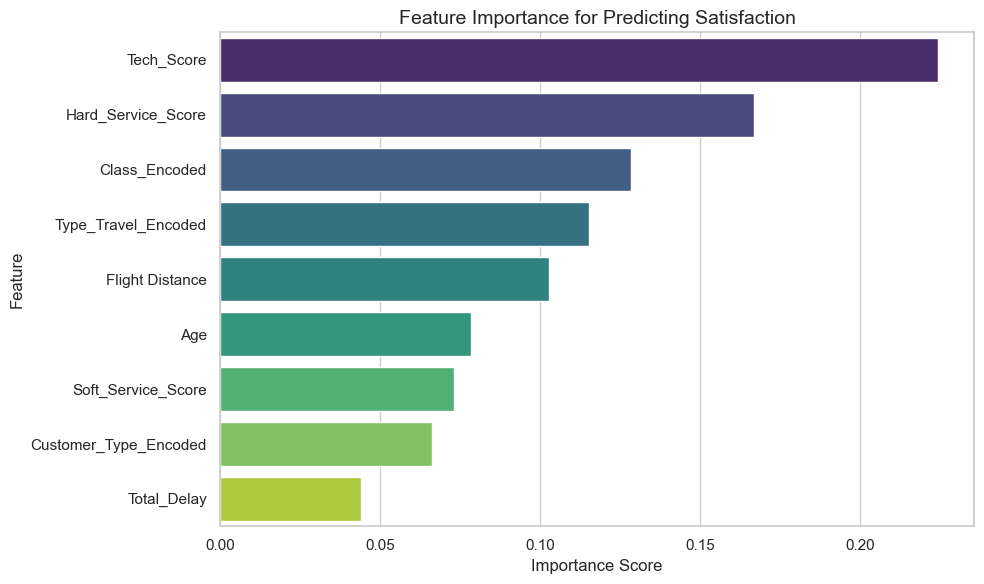

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode Ordinal/Categorical Features
le = LabelEncoder()
df['Class_Encoded'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
df['Type_Travel_Encoded'] = le.fit_transform(df['Type of Travel']) # Usually Business travel vs Personal
df['Customer_Type_Encoded'] = le.fit_transform(df['Customer Type']) # Loyal vs Disloyal

# Select Features for Importance Analysis
features = ['Hard_Service_Score', 'Soft_Service_Score', 'Tech_Score', 
            'Flight Distance', 'Total_Delay', 'Class_Encoded', 
            'Type_Travel_Encoded', 'Customer_Type_Encoded', 'Age']

X = df[features].dropna()
y = df.loc[X.index, 'satisfaction_score']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get Feature Importances
importances = rf.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance for Predicting Satisfaction', fontsize=14)
plt.xlabel('Importance Score')
plt.tight_layout()

# Also correlation of the specific user-mentioned variables with satisfaction
user_vars = ['Hard_Service_Score', 'Soft_Service_Score', 'Tech_Score', 'Flight Distance']
corr_with_target = df[user_vars + ['satisfaction_score']].corr()['satisfaction_score'].drop('satisfaction_score')
print("Correlation with Satisfaction:")
print(corr_with_target)